### Обучение модели на основе нейронной сети для распознавания рукописных букв английского алфавита.

## Данные

Данные представлены двумя датасетами: обучающим (`train`) и тестовым (`test`). Изображения для каждого датасета находятся в `images.zip`.  
  
Обучающая выборка состоит из 65000 изображений - по 2500 изображений для каждой буквы.  
Тестовая выборка состоит из 13000 изображений - по 500 изображений для каждой буквы.  

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pic = plt.imread('images/train/a/a_00002.jpg')
print(pic.shape)

(28, 28, 3)


In [3]:
pic = np.transpose(pic, axes=(1, 0, 2))

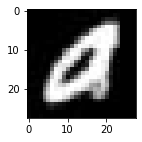

In [4]:
plt.figure(figsize=(2,2))
plt.imshow(pic)
plt.show()

### Задачи
1. Постройте и обучите модели с 2-мя и 3-мя полносвязными (dense) скрытыми слоями.  
2. Для наилучшей модели постройте confusion matrix результатов предсказаний модели на тестовых данных.  
3. Найдите 10 пар букв, которые чаще всего путаются между собой, дайте возможное объяснение. Приведите примеры с картинками, которые были детектированы с ошибкой.    

In [1]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

import random
import os
import matplotlib.pyplot as plt
from numpy import genfromtxt
import numpy as np

import seaborn as sn

In [2]:
def seed_everything(seed=42):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    
RANDOM_STATE = 42
seed_everything(seed=RANDOM_STATE)

In [3]:
class Net3(nn.Module):
    def __init__(self):
        super(Net3, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 200)
        self.fc2 = nn.Linear(200, 200)
        self.fc3 = nn.Linear(200, 26)
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.log_softmax(x,dim=1)

class Net3_2000(nn.Module):
    def __init__(self):
        super(Net3_2000, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 2000)
        self.fc2 = nn.Linear(2000, 2000)
        self.fc3 = nn.Linear(2000, 26)
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.log_softmax(x,dim=1)

class Net2(nn.Module):
    def __init__(self):
        super(Net2, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 200)
        self.fc2 = nn.Linear(200, 26)
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x,dim=1)
    
class Net2_selu(nn.Module):
    def __init__(self):
        super(Net2_selu, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 200)
        self.fc2 = nn.Linear(200, 26)
    def forward(self, x):
        x = F.selu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x,dim=1)
    
class Net2_elu(nn.Module):
    def __init__(self):
        super(Net2_elu, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 200)
        self.fc2 = nn.Linear(200, 26)
    def forward(self, x):
        x = F.elu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x,dim=1)
    
class Net2_relu6(nn.Module):
    def __init__(self):
        super(Net2_relu6, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 200)
        self.fc2 = nn.Linear(200, 26)
    def forward(self, x):
        x = F.elu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x,dim=1)
    
    
    
class Net2_1000(nn.Module):
    def __init__(self):
        super(Net2_1000, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 1000)
        self.fc2 = nn.Linear(1000, 26)
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x,dim=1)
                             
class Net2_2000(nn.Module):
    def __init__(self):
        super(Net2_2000, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 2000)
        self.fc2 = nn.Linear(2000, 26)
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x,dim=1)

In [71]:
def load_set():
    transformations = transforms.Compose([
        transforms.Grayscale(1),
        transforms.ToTensor(),
    ])

    train_set = datasets.ImageFolder(root="./images/train", transform = transformations)
    test_set = datasets.ImageFolder(root="./images/test", transform = transformations)
    return train_set, test_set

def load_data(batch_size,train_set,test_set):    
    train_loader = torch.utils.data.DataLoader(train_set,batch_size=batch_size, shuffle=True)
    test_loader = torch.utils.data.DataLoader(test_set,batch_size =batch_size, shuffle=True)
    return train_loader, test_loader

def prep_model(model_name, 
               criterion_, 
               optimazer_, 
               learning_rate):
    if model_name == 'Net2':
        model = Net2()
        
    elif model_name == 'Net3':
        model = Net3()
        
    elif model_name == 'CNN1':
        model = ConvNet1()
       
    elif model_name == 'CNN2':
        model = ConvNet2()
    
    elif model_name == 'CNN3':
        model = ConvNet3()
        
    elif model_name == 'CNN3_pr':
        model = ConvNet3_pr()
    
    elif model_name == 'CNN3_pr1':
        model = ConvNet3_pr1()
    
    elif model_name == 'CNN3_b':
        model = ConvNet3_b()   
    
    elif model_name == 'Net2_1000':
        model = Net2_1000()
    
    elif model_name == 'Net2_2000':
        model = Net2_2000()
        
    elif model_name == 'Net3_2000':
        model = Net3_2000()
    
    elif model_name == 'Net2_selu':
        model = Net2_selu()
        
    elif model_name == 'Net2_elu':
        model = Net2_elu()

    elif model_name == 'Net2_relu6':
        model = Net2_relu6()
    
    if optimazer_ == 'SGD': 
        optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)
    elif optimazer_ == 'Adam':
        optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    elif optimazer_ == 'ASGD': 
        optimizer = optim.ASGD(model.parameters(), lr=learning_rate)
    elif optimazer_ == 'RMSprop': 
        optimizer = optim.RMSprop(model.parameters(), lr=learning_rate, momentum=0.9)
    elif optimazer_ == 'Adamax': 
        optimizer = optim.Adamax(model.parameters(), lr=learning_rate)

       
       
    if criterion_ == 'NLLLoss':
        criterion = nn.NLLLoss()
    elif criterion_ == 'CrossEntropyLoss':
        criterion = nn.CrossEntropyLoss()
        
    return model,criterion,optimizer
    

def train(model,train_loader,criterion,optimizer,log_interval=500,epochs=10):
    f = []
    for epoch in range(epochs):
        for batch_idx, (data, target) in enumerate(train_loader):
            data, target = Variable(data), Variable(target)
            data = data.view(-1, 28*28)
            optimizer.zero_grad()
            model_out = model(data)
            loss = criterion(model_out, target)
            loss.backward()
            optimizer.step()
            f.append(loss.data)
            if batch_idx % log_interval == 0:
                print('Train Epoch: {} [{}/{} ({:.0f}%)]tLoss: {:.6f}'.format(epoch, 
                                                                              batch_idx * len(data),
                                                                              len(train_loader.dataset),
                                                                          100. * batch_idx / len(train_loader),
                                                                          loss.data))
    plt.plot(f)
    plt.show()
    
def test(model,test_loader,criterion):
    model.eval()
    with torch.no_grad():
            
        test_loss = 0
        correct = 0
        for data, target in test_loader:
            data, target = Variable(data), Variable(target)
            data = data.view(-1, 28 * 28)
            model_out = model(data)
            test_loss += criterion(model_out, target).data
            pred = model_out.data.max(1)[1]
            correct += pred.eq(target.data).sum()

        test_loss /= len(test_loader.dataset)
        print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
            test_loss, correct, len(test_loader.dataset),
            100. * correct / len(test_loader.dataset)))
        
def plot_cm(model, test_loader):
    nb_classes = 26

    confusion__matrix = torch.zeros(nb_classes, nb_classes)
    with torch.no_grad():
        for i, (inputs, classes) in enumerate(test_loader):
            inputs = inputs.view(-1, 28 * 28)        
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for t, p in zip(classes.view(-1), preds.view(-1)):
                    confusion__matrix[t.int(), p.int()] += 1
    plt.figure(figsize = (15,15))
    sn.heatmap(confusion__matrix, annot=True, annot_kws={"size": 10},
           xticklabels=test_set.classes, yticklabels=test_set.classes,cmap= 'coolwarm', cbar=False, fmt=".1f")
    plt.show()

Полносвязные сети с двумя и тремя слоями.

Train Epoch: 0 [0/65000 (0%)]tLoss: 3.260386
Train Epoch: 1 [0/65000 (0%)]tLoss: 0.752435
Train Epoch: 2 [0/65000 (0%)]tLoss: 0.537119
Train Epoch: 3 [0/65000 (0%)]tLoss: 0.395486
Train Epoch: 4 [0/65000 (0%)]tLoss: 0.447812
Train Epoch: 5 [0/65000 (0%)]tLoss: 0.356348
Train Epoch: 6 [0/65000 (0%)]tLoss: 0.419236
Train Epoch: 7 [0/65000 (0%)]tLoss: 0.340415
Train Epoch: 8 [0/65000 (0%)]tLoss: 0.292107
Train Epoch: 9 [0/65000 (0%)]tLoss: 0.208866


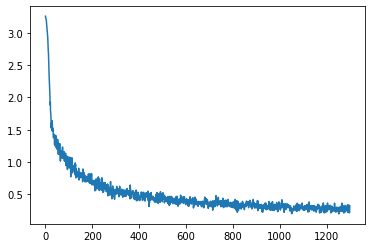


Test set: Average loss: 0.0007, Accuracy: 11553/13000 (89%)



In [5]:
train_set, test_set = load_set()
train_loader, test_loader = load_data(500,train_set,test_set) # (batch_size)
model,criterion,optimizer = prep_model('Net2','NLLLoss','SGD',0.1)# learning_rate
train(model,train_loader,criterion,optimizer,epochs=10)
test(model,test_loader,criterion)
#plot_cm(model,test_loader)

Train Epoch: 0 [0/65000 (0%)]tLoss: 3.258767
Train Epoch: 1 [0/65000 (0%)]tLoss: 0.728767
Train Epoch: 2 [0/65000 (0%)]tLoss: 0.597926
Train Epoch: 3 [0/65000 (0%)]tLoss: 0.342693
Train Epoch: 4 [0/65000 (0%)]tLoss: 0.392569
Train Epoch: 5 [0/65000 (0%)]tLoss: 0.264335
Train Epoch: 6 [0/65000 (0%)]tLoss: 0.229492
Train Epoch: 7 [0/65000 (0%)]tLoss: 0.231086
Train Epoch: 8 [0/65000 (0%)]tLoss: 0.182690
Train Epoch: 9 [0/65000 (0%)]tLoss: 0.156234


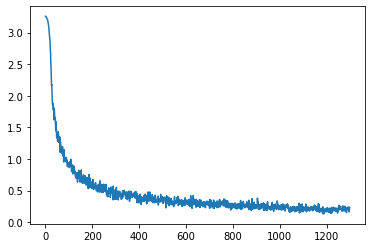


Test set: Average loss: 0.0007, Accuracy: 11589/13000 (89%)



In [6]:
train_set, test_set = load_set()
train_loader, test_loader = load_data(500,train_set,test_set) # (batch_size)
model,criterion,optimizer = prep_model('Net3','NLLLoss','SGD',0.1)# learning_rate
train(model,train_loader,criterion,optimizer,epochs=10)
test(model,test_loader,criterion)
#plot_cm(model,test_loader)

Число нейронов

Train Epoch: 0 [0/65000 (0%)]tLoss: 3.273869
Train Epoch: 1 [0/65000 (0%)]tLoss: 0.689450
Train Epoch: 2 [0/65000 (0%)]tLoss: 0.469878
Train Epoch: 3 [0/65000 (0%)]tLoss: 0.395785
Train Epoch: 4 [0/65000 (0%)]tLoss: 0.305615
Train Epoch: 5 [0/65000 (0%)]tLoss: 0.360754
Train Epoch: 6 [0/65000 (0%)]tLoss: 0.237377
Train Epoch: 7 [0/65000 (0%)]tLoss: 0.254179
Train Epoch: 8 [0/65000 (0%)]tLoss: 0.202408
Train Epoch: 9 [0/65000 (0%)]tLoss: 0.159003


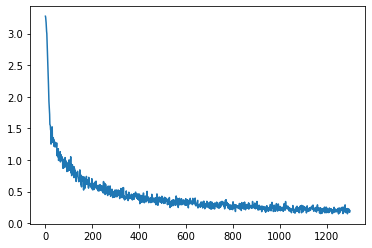


Test set: Average loss: 0.0006, Accuracy: 11727/13000 (90%)



In [7]:
train_set, test_set = load_set()
train_loader, test_loader = load_data(500,train_set,test_set) # (batch_size)
model,criterion,optimizer = prep_model('Net2_2000','NLLLoss','SGD',0.1)# learning_rate
train(model,train_loader,criterion,optimizer,epochs=10)
test(model,test_loader,criterion)
#plot_cm(model,test_loader)

Train Epoch: 0 [0/65000 (0%)]tLoss: 3.268623
Train Epoch: 1 [0/65000 (0%)]tLoss: 0.730896
Train Epoch: 2 [0/65000 (0%)]tLoss: 0.469314
Train Epoch: 3 [0/65000 (0%)]tLoss: 0.415510
Train Epoch: 4 [0/65000 (0%)]tLoss: 0.347314
Train Epoch: 5 [0/65000 (0%)]tLoss: 0.326533
Train Epoch: 6 [0/65000 (0%)]tLoss: 0.319876
Train Epoch: 7 [0/65000 (0%)]tLoss: 0.316406
Train Epoch: 8 [0/65000 (0%)]tLoss: 0.169899
Train Epoch: 9 [0/65000 (0%)]tLoss: 0.216384


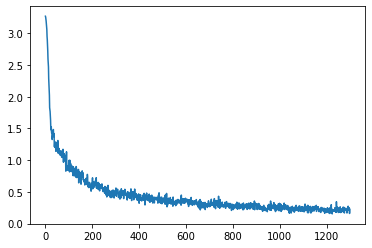


Test set: Average loss: 0.0007, Accuracy: 11654/13000 (90%)



In [8]:
train_set, test_set = load_set()
train_loader, test_loader = load_data(500,train_set,test_set) # (batch_size)
model,criterion,optimizer = prep_model('Net2_1000','NLLLoss','SGD',0.1)# learning_rate
train(model,train_loader,criterion,optimizer,epochs=10)
test(model,test_loader,criterion)
#plot_cm(model,test_loader)

Train Epoch: 0 [0/65000 (0%)]tLoss: 3.257048
Train Epoch: 1 [0/65000 (0%)]tLoss: 0.674968
Train Epoch: 2 [0/65000 (0%)]tLoss: 0.416619
Train Epoch: 3 [0/65000 (0%)]tLoss: 0.306819
Train Epoch: 4 [0/65000 (0%)]tLoss: 0.250088
Train Epoch: 5 [0/65000 (0%)]tLoss: 0.219348
Train Epoch: 6 [0/65000 (0%)]tLoss: 0.174047
Train Epoch: 7 [0/65000 (0%)]tLoss: 0.141986
Train Epoch: 8 [0/65000 (0%)]tLoss: 0.132073
Train Epoch: 9 [0/65000 (0%)]tLoss: 0.107252
Train Epoch: 10 [0/65000 (0%)]tLoss: 0.113423
Train Epoch: 11 [0/65000 (0%)]tLoss: 0.116469
Train Epoch: 12 [0/65000 (0%)]tLoss: 0.078637
Train Epoch: 13 [0/65000 (0%)]tLoss: 0.117614
Train Epoch: 14 [0/65000 (0%)]tLoss: 0.057352


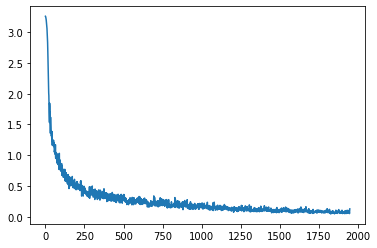


Test set: Average loss: 0.0006, Accuracy: 11879/13000 (91%)



In [9]:
train_set, test_set = load_set()
train_loader, test_loader = load_data(500,train_set,test_set) # (batch_size)
model,criterion,optimizer = prep_model('Net3_2000','NLLLoss','SGD',0.1)# learning_rate
train(model,train_loader,criterion,optimizer,epochs=15)
test(model,test_loader,criterion)
#plot_cm(model,test_loader)

функции активации

Train Epoch: 0 [0/65000 (0%)]tLoss: 3.283013
Train Epoch: 1 [0/65000 (0%)]tLoss: 1.062983
Train Epoch: 2 [0/65000 (0%)]tLoss: 0.724339
Train Epoch: 3 [0/65000 (0%)]tLoss: 0.499310
Train Epoch: 4 [0/65000 (0%)]tLoss: 0.436546
Train Epoch: 5 [0/65000 (0%)]tLoss: 0.496396
Train Epoch: 6 [0/65000 (0%)]tLoss: 0.415133
Train Epoch: 7 [0/65000 (0%)]tLoss: 0.313291
Train Epoch: 8 [0/65000 (0%)]tLoss: 0.334473
Train Epoch: 9 [0/65000 (0%)]tLoss: 0.366141


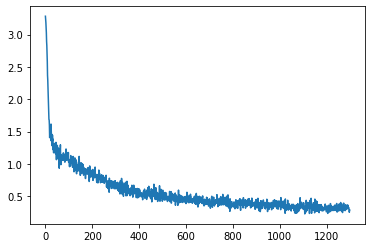


Test set: Average loss: 0.0008, Accuracy: 11380/13000 (88%)



In [10]:
train_set, test_set = load_set()
train_loader, test_loader = load_data(500,train_set,test_set) # (batch_size)
model,criterion,optimizer = prep_model('Net2_selu','NLLLoss','SGD',0.1)# learning_rate
train(model,train_loader,criterion,optimizer,epochs=10)
test(model,test_loader,criterion)
#plot_cm(model,test_loader)

Train Epoch: 0 [0/65000 (0%)]tLoss: 3.266356
Train Epoch: 1 [0/65000 (0%)]tLoss: 0.933457
Train Epoch: 2 [0/65000 (0%)]tLoss: 0.667886
Train Epoch: 3 [0/65000 (0%)]tLoss: 0.543908
Train Epoch: 4 [0/65000 (0%)]tLoss: 0.518723
Train Epoch: 5 [0/65000 (0%)]tLoss: 0.407534
Train Epoch: 6 [0/65000 (0%)]tLoss: 0.333505
Train Epoch: 7 [0/65000 (0%)]tLoss: 0.373096
Train Epoch: 8 [0/65000 (0%)]tLoss: 0.380522
Train Epoch: 9 [0/65000 (0%)]tLoss: 0.345751


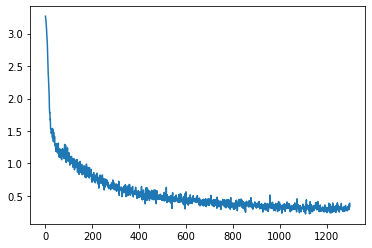


Test set: Average loss: 0.0008, Accuracy: 11452/13000 (88%)



In [11]:
train_set, test_set = load_set()
train_loader, test_loader = load_data(500,train_set,test_set) # (batch_size)
model,criterion,optimizer = prep_model('Net2_elu','NLLLoss','SGD',0.1)# learning_rate
train(model,train_loader,criterion,optimizer,epochs=10)
test(model,test_loader,criterion)
#plot_cm(model,test_loader)

Train Epoch: 0 [0/65000 (0%)]tLoss: 3.286553
Train Epoch: 1 [0/65000 (0%)]tLoss: 0.957522
Train Epoch: 2 [0/65000 (0%)]tLoss: 0.712072
Train Epoch: 3 [0/65000 (0%)]tLoss: 0.534074
Train Epoch: 4 [0/65000 (0%)]tLoss: 0.457139
Train Epoch: 5 [0/65000 (0%)]tLoss: 0.371178
Train Epoch: 6 [0/65000 (0%)]tLoss: 0.337128
Train Epoch: 7 [0/65000 (0%)]tLoss: 0.297301
Train Epoch: 8 [0/65000 (0%)]tLoss: 0.341520
Train Epoch: 9 [0/65000 (0%)]tLoss: 0.283822


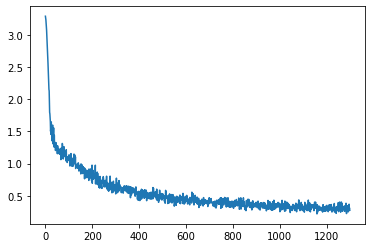


Test set: Average loss: 0.0007, Accuracy: 11493/13000 (88%)



In [12]:
train_set, test_set = load_set()
train_loader, test_loader = load_data(500,train_set,test_set) # (batch_size)
model,criterion,optimizer = prep_model('Net2_relu6','NLLLoss','SGD',0.1)# learning_rate
train(model,train_loader,criterion,optimizer,epochs=10)
test(model,test_loader,criterion)
#plot_cm(model,test_loader)

функции регуляризации

Train Epoch: 0 [0/65000 (0%)]tLoss: 3.259112
Train Epoch: 1 [0/65000 (0%)]tLoss: 1.815621
Train Epoch: 2 [0/65000 (0%)]tLoss: 1.432374
Train Epoch: 3 [0/65000 (0%)]tLoss: 1.220500
Train Epoch: 4 [0/65000 (0%)]tLoss: 1.384346
Train Epoch: 5 [0/65000 (0%)]tLoss: 1.210799
Train Epoch: 6 [0/65000 (0%)]tLoss: 1.257975
Train Epoch: 7 [0/65000 (0%)]tLoss: 1.305375
Train Epoch: 8 [0/65000 (0%)]tLoss: 1.186313
Train Epoch: 9 [0/65000 (0%)]tLoss: 1.183610


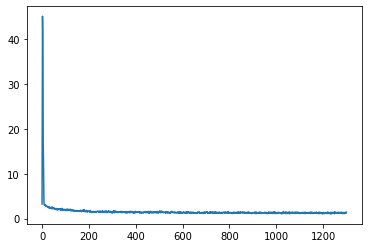


Test set: Average loss: 0.0027, Accuracy: 8017/13000 (62%)



In [13]:
train_set, test_set = load_set()
train_loader, test_loader = load_data(500,train_set,test_set) # (batch_size)
model,criterion,optimizer = prep_model('Net2','NLLLoss','Adam', 0.1)# learning_rate
train(model,train_loader,criterion,optimizer,epochs=10)
test(model,test_loader,criterion)
#plot_cm(model,test_loader)

Train Epoch: 0 [0/65000 (0%)]tLoss: 3.264662
Train Epoch: 1 [0/65000 (0%)]tLoss: 1.086669
Train Epoch: 2 [0/65000 (0%)]tLoss: 0.815686
Train Epoch: 3 [0/65000 (0%)]tLoss: 0.744664
Train Epoch: 4 [0/65000 (0%)]tLoss: 0.705311
Train Epoch: 5 [0/65000 (0%)]tLoss: 0.672152
Train Epoch: 6 [0/65000 (0%)]tLoss: 0.582057
Train Epoch: 7 [0/65000 (0%)]tLoss: 0.722794
Train Epoch: 8 [0/65000 (0%)]tLoss: 0.564358
Train Epoch: 9 [0/65000 (0%)]tLoss: 0.658191


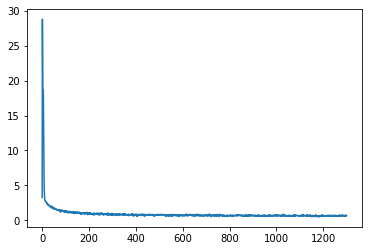


Test set: Average loss: 0.0015, Accuracy: 10152/13000 (78%)



In [14]:
train_set, test_set = load_set()
train_loader, test_loader = load_data(500,train_set,test_set) # (batch_size)
model,criterion,optimizer = prep_model('Net2','NLLLoss','Adamax', 0.1)# learning_rate
train(model,train_loader,criterion,optimizer,epochs=10)
test(model,test_loader,criterion)
#plot_cm(model,test_loader)

Train Epoch: 0 [0/65000 (0%)]tLoss: 3.256109
Train Epoch: 1 [0/65000 (0%)]tLoss: 1.607409
Train Epoch: 2 [0/65000 (0%)]tLoss: 1.375637
Train Epoch: 3 [0/65000 (0%)]tLoss: 1.172717
Train Epoch: 4 [0/65000 (0%)]tLoss: 1.048458
Train Epoch: 5 [0/65000 (0%)]tLoss: 1.094572
Train Epoch: 6 [0/65000 (0%)]tLoss: 0.973370
Train Epoch: 7 [0/65000 (0%)]tLoss: 0.842825
Train Epoch: 8 [0/65000 (0%)]tLoss: 0.815771
Train Epoch: 9 [0/65000 (0%)]tLoss: 0.775692


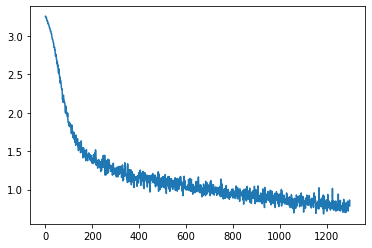


Test set: Average loss: 0.0016, Accuracy: 10017/13000 (77%)



In [15]:
train_set, test_set = load_set()
train_loader, test_loader = load_data(500,train_set,test_set) # (batch_size)
model,criterion,optimizer = prep_model('Net2','NLLLoss','ASGD', 0.1)# learning_rate
train(model,train_loader,criterion,optimizer,epochs=10)
test(model,test_loader,criterion)
#plot_cm(model,test_loader)

learning rate

Train Epoch: 0 [0/65000 (0%)]tLoss: 3.259993
Train Epoch: 1 [0/65000 (0%)]tLoss: 0.990570
Train Epoch: 2 [0/65000 (0%)]tLoss: 0.476433
Train Epoch: 3 [0/65000 (0%)]tLoss: 0.475255
Train Epoch: 4 [0/65000 (0%)]tLoss: 0.381501
Train Epoch: 5 [0/65000 (0%)]tLoss: 0.331107
Train Epoch: 6 [0/65000 (0%)]tLoss: 0.365126
Train Epoch: 7 [0/65000 (0%)]tLoss: 0.241529
Train Epoch: 8 [0/65000 (0%)]tLoss: 0.276528
Train Epoch: 9 [0/65000 (0%)]tLoss: 0.211368


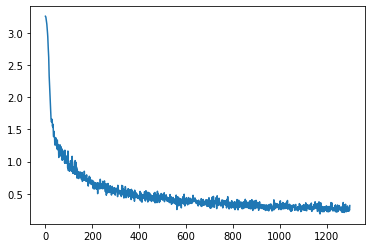


Test set: Average loss: 0.0007, Accuracy: 11500/13000 (88%)



In [16]:
train_set, test_set = load_set()
train_loader, test_loader = load_data(500,train_set,test_set) # (batch_size)
model,criterion,optimizer = prep_model('Net2','NLLLoss','SGD',0.1)# learning_rate
train(model,train_loader,criterion,optimizer,epochs=10)
test(model,test_loader,criterion)
#plot_cm(model,test_loader)

Train Epoch: 0 [0/65000 (0%)]tLoss: 3.258999
Train Epoch: 1 [0/65000 (0%)]tLoss: 0.749838
Train Epoch: 2 [0/65000 (0%)]tLoss: 0.446695
Train Epoch: 3 [0/65000 (0%)]tLoss: 0.305533
Train Epoch: 4 [0/65000 (0%)]tLoss: 0.396901
Train Epoch: 5 [0/65000 (0%)]tLoss: 0.297216
Train Epoch: 6 [0/65000 (0%)]tLoss: 0.216030
Train Epoch: 7 [0/65000 (0%)]tLoss: 0.252474
Train Epoch: 8 [0/65000 (0%)]tLoss: 0.197486
Train Epoch: 9 [0/65000 (0%)]tLoss: 0.173666


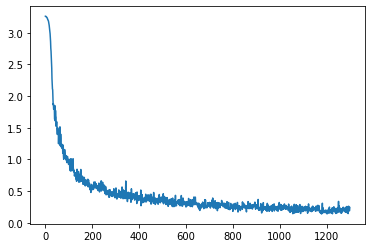


Test set: Average loss: 0.0006, Accuracy: 11673/13000 (90%)



In [17]:
train_set, test_set = load_set()
train_loader, test_loader = load_data(500,train_set,test_set) # (batch_size)
model,criterion,optimizer = prep_model('Net3','NLLLoss','SGD',0.1)# learning_rate
train(model,train_loader,criterion,optimizer,epochs=10)
test(model,test_loader,criterion)

Train Epoch: 0 [0/65000 (0%)]tLoss: 3.262506
Train Epoch: 1 [0/65000 (0%)]tLoss: 0.645640
Train Epoch: 2 [0/65000 (0%)]tLoss: 0.433578
Train Epoch: 3 [0/65000 (0%)]tLoss: 0.349807
Train Epoch: 4 [0/65000 (0%)]tLoss: 0.319142
Train Epoch: 5 [0/65000 (0%)]tLoss: 0.273184
Train Epoch: 6 [0/65000 (0%)]tLoss: 0.263567
Train Epoch: 7 [0/65000 (0%)]tLoss: 0.190129
Train Epoch: 8 [0/65000 (0%)]tLoss: 0.200884
Train Epoch: 9 [0/65000 (0%)]tLoss: 0.177224


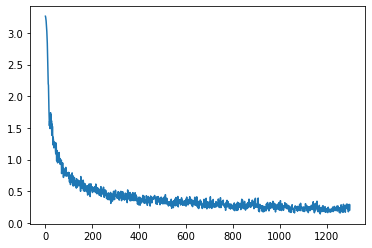


Test set: Average loss: 0.0008, Accuracy: 11528/13000 (89%)



In [18]:
train_set, test_set = load_set()
train_loader, test_loader = load_data(500,train_set,test_set) # (batch_size)
model,criterion,optimizer = prep_model('Net2','NLLLoss','SGD',0.2)# learning_rate
train(model,train_loader,criterion,optimizer,epochs=10)
test(model,test_loader,criterion)
#plot_cm(model,test_loader)

Train Epoch: 0 [0/65000 (0%)]tLoss: 3.259515
Train Epoch: 1 [0/65000 (0%)]tLoss: 0.488079


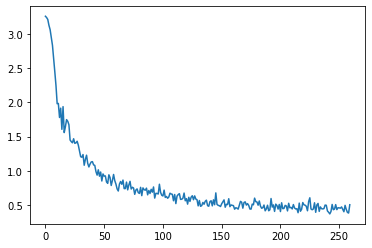


Test set: Average loss: 0.0010, Accuracy: 11022/13000 (85%)



In [19]:
train_set, test_set = load_set()
train_loader, test_loader = load_data(500,train_set,test_set) # (batch_size)
model,criterion,optimizer = prep_model('Net2','NLLLoss','SGD',0.3)# learning_rate
train(model,train_loader,criterion,optimizer,epochs=2)
test(model,test_loader,criterion)
#plot_cm(model,test_loader)

Train Epoch: 0 [0/65000 (0%)]tLoss: 3.255328
Train Epoch: 1 [0/65000 (0%)]tLoss: 0.522844
Train Epoch: 2 [0/65000 (0%)]tLoss: 0.412048
Train Epoch: 3 [0/65000 (0%)]tLoss: 0.366569
Train Epoch: 4 [0/65000 (0%)]tLoss: 0.285303
Train Epoch: 5 [0/65000 (0%)]tLoss: 0.288664
Train Epoch: 6 [0/65000 (0%)]tLoss: 0.262674
Train Epoch: 7 [0/65000 (0%)]tLoss: 0.278632
Train Epoch: 8 [0/65000 (0%)]tLoss: 0.237584
Train Epoch: 9 [0/65000 (0%)]tLoss: 0.260231


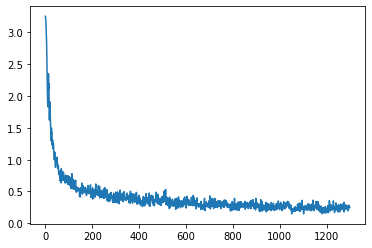


Test set: Average loss: 0.0009, Accuracy: 11392/13000 (88%)



In [20]:
train_set, test_set = load_set()
train_loader, test_loader = load_data(500,train_set,test_set) # (batch_size)
model,criterion,optimizer = prep_model('Net2','NLLLoss','SGD',0.4)# learning_rate
train(model,train_loader,criterion,optimizer,epochs=10)
test(model,test_loader,criterion)
#plot_cm(model,test_loader)

Train Epoch: 0 [0/65000 (0%)]tLoss: 3.252876
Train Epoch: 1 [0/65000 (0%)]tLoss: 0.946041
Train Epoch: 2 [0/65000 (0%)]tLoss: 0.610785
Train Epoch: 3 [0/65000 (0%)]tLoss: 0.539776
Train Epoch: 4 [0/65000 (0%)]tLoss: 0.356316
Train Epoch: 5 [0/65000 (0%)]tLoss: 0.352529
Train Epoch: 6 [0/65000 (0%)]tLoss: 0.367661
Train Epoch: 7 [0/65000 (0%)]tLoss: 0.321153
Train Epoch: 8 [0/65000 (0%)]tLoss: 0.315554
Train Epoch: 9 [0/65000 (0%)]tLoss: 0.219192


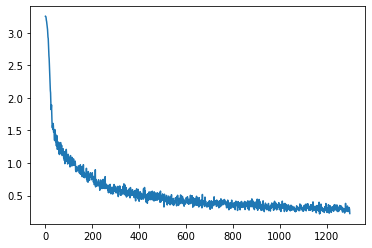


Test set: Average loss: 0.0007, Accuracy: 11523/13000 (89%)



In [21]:
train_set, test_set = load_set()
train_loader, test_loader = load_data(500,train_set,test_set) # (batch_size)
model,criterion,optimizer = prep_model('Net2','NLLLoss','SGD',0.08)# learning_rate
train(model,train_loader,criterion,optimizer,epochs=10)
test(model,test_loader,criterion)
#plot_cm(model,test_loade

Train Epoch: 0 [0/65000 (0%)]tLoss: 3.259285
Train Epoch: 1 [0/65000 (0%)]tLoss: 1.112277
Train Epoch: 2 [0/65000 (0%)]tLoss: 0.790310
Train Epoch: 3 [0/65000 (0%)]tLoss: 0.657825
Train Epoch: 4 [0/65000 (0%)]tLoss: 0.628842
Train Epoch: 5 [0/65000 (0%)]tLoss: 0.457950
Train Epoch: 6 [0/65000 (0%)]tLoss: 0.379707
Train Epoch: 7 [0/65000 (0%)]tLoss: 0.336859
Train Epoch: 8 [0/65000 (0%)]tLoss: 0.372839
Train Epoch: 9 [0/65000 (0%)]tLoss: 0.336608


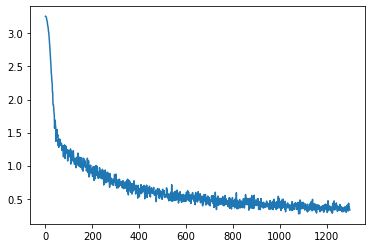


Test set: Average loss: 0.0008, Accuracy: 11355/13000 (87%)



In [22]:
train_set, test_set = load_set()
train_loader, test_loader = load_data(500,train_set,test_set) # (batch_size)
model,criterion,optimizer = prep_model('Net2','NLLLoss','SGD',0.05)# learning_rate
train(model,train_loader,criterion,optimizer,epochs=10)
test(model,test_loader,criterion)
#plot_cm(model,test_loader)

размер batch_size и количество эпох

Train Epoch: 0 [0/65000 (0%)]tLoss: 3.257450
Train Epoch: 1 [0/65000 (0%)]tLoss: 1.076247
Train Epoch: 2 [0/65000 (0%)]tLoss: 0.555418
Train Epoch: 3 [0/65000 (0%)]tLoss: 0.440242
Train Epoch: 4 [0/65000 (0%)]tLoss: 0.411732
Train Epoch: 5 [0/65000 (0%)]tLoss: 0.326496
Train Epoch: 6 [0/65000 (0%)]tLoss: 0.273453
Train Epoch: 7 [0/65000 (0%)]tLoss: 0.215855
Train Epoch: 8 [0/65000 (0%)]tLoss: 0.262468
Train Epoch: 9 [0/65000 (0%)]tLoss: 0.201725
Train Epoch: 10 [0/65000 (0%)]tLoss: 0.177666
Train Epoch: 11 [0/65000 (0%)]tLoss: 0.152271
Train Epoch: 12 [0/65000 (0%)]tLoss: 0.151029
Train Epoch: 13 [0/65000 (0%)]tLoss: 0.144081
Train Epoch: 14 [0/65000 (0%)]tLoss: 0.160307
Train Epoch: 15 [0/65000 (0%)]tLoss: 0.133049
Train Epoch: 16 [0/65000 (0%)]tLoss: 0.085884
Train Epoch: 17 [0/65000 (0%)]tLoss: 0.094508
Train Epoch: 18 [0/65000 (0%)]tLoss: 0.104926
Train Epoch: 19 [0/65000 (0%)]tLoss: 0.098645
Train Epoch: 20 [0/65000 (0%)]tLoss: 0.100833
Train Epoch: 21 [0/65000 (0%)]tLoss: 0.08112

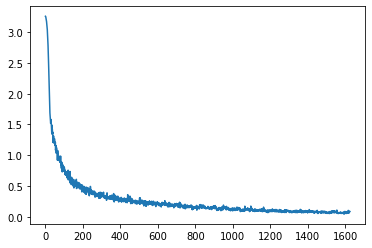


Test set: Average loss: 0.0003, Accuracy: 11833/13000 (91%)



In [23]:
train_set, test_set = load_set()
train_loader, test_loader = load_data(1000,train_set,test_set) # (batch_size)
model,criterion,optimizer = prep_model('Net3_2000','NLLLoss','SGD',0.1)# learning_rate
train(model,train_loader,criterion,optimizer,epochs=25)
test(model,test_loader,criterion)
#plot_cm(model,test_loader)

Train Epoch: 0 [0/65000 (0%)]tLoss: 3.258565
Train Epoch: 1 [0/65000 (0%)]tLoss: 0.595014
Train Epoch: 2 [0/65000 (0%)]tLoss: 0.432594
Train Epoch: 3 [0/65000 (0%)]tLoss: 0.294456
Train Epoch: 4 [0/65000 (0%)]tLoss: 0.264118
Train Epoch: 5 [0/65000 (0%)]tLoss: 0.203303
Train Epoch: 6 [0/65000 (0%)]tLoss: 0.167742
Train Epoch: 7 [0/65000 (0%)]tLoss: 0.168077
Train Epoch: 8 [0/65000 (0%)]tLoss: 0.157520
Train Epoch: 9 [0/65000 (0%)]tLoss: 0.175478
Train Epoch: 10 [0/65000 (0%)]tLoss: 0.130082
Train Epoch: 11 [0/65000 (0%)]tLoss: 0.128491
Train Epoch: 12 [0/65000 (0%)]tLoss: 0.072562
Train Epoch: 13 [0/65000 (0%)]tLoss: 0.083315
Train Epoch: 14 [0/65000 (0%)]tLoss: 0.092402
Train Epoch: 15 [0/65000 (0%)]tLoss: 0.055899
Train Epoch: 16 [0/65000 (0%)]tLoss: 0.044839
Train Epoch: 17 [0/65000 (0%)]tLoss: 0.045301
Train Epoch: 18 [0/65000 (0%)]tLoss: 0.067630
Train Epoch: 19 [0/65000 (0%)]tLoss: 0.044809
Train Epoch: 20 [0/65000 (0%)]tLoss: 0.049169
Train Epoch: 21 [0/65000 (0%)]tLoss: 0.05898

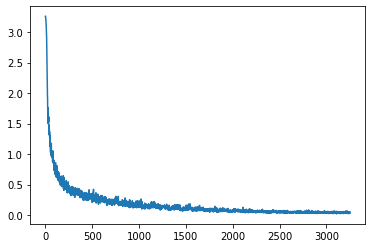


Test set: Average loss: 0.0007, Accuracy: 11902/13000 (92%)



In [24]:
train_set, test_set = load_set()
train_loader, test_loader = load_data(500,train_set,test_set) # (batch_size)
model,criterion,optimizer = prep_model('Net3_2000','NLLLoss','SGD',0.1)# learning_rate
train(model,train_loader,criterion,optimizer,epochs=25)
test(model,test_loader,criterion)
#plot_cm(model,test_loader)

Train Epoch: 0 [0/65000 (0%)]tLoss: 3.263171
Train Epoch: 1 [0/65000 (0%)]tLoss: 0.976672
Train Epoch: 2 [0/65000 (0%)]tLoss: 0.621824
Train Epoch: 3 [0/65000 (0%)]tLoss: 0.487969
Train Epoch: 4 [0/65000 (0%)]tLoss: 0.367297
Train Epoch: 5 [0/65000 (0%)]tLoss: 0.329327
Train Epoch: 6 [0/65000 (0%)]tLoss: 0.297902


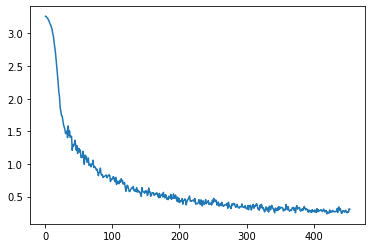


Test set: Average loss: 0.0003, Accuracy: 11603/13000 (89%)



In [25]:
train_set, test_set = load_set()
train_loader, test_loader = load_data(1000,train_set,test_set) # (batch_size)
model,criterion,optimizer = prep_model('Net3_2000','NLLLoss','SGD',0.1)# learning_rate
train(model,train_loader,criterion,optimizer,epochs=7)
test(model,test_loader,criterion)
#plot_cm(model,test_loader)

Train Epoch: 0 [0/65000 (0%)]tLoss: 3.261837
Train Epoch: 1 [0/65000 (0%)]tLoss: 1.001726
Train Epoch: 2 [0/65000 (0%)]tLoss: 0.580739
Train Epoch: 3 [0/65000 (0%)]tLoss: 0.452074
Train Epoch: 4 [0/65000 (0%)]tLoss: 0.380430
Train Epoch: 5 [0/65000 (0%)]tLoss: 0.331881
Train Epoch: 6 [0/65000 (0%)]tLoss: 0.234933
Train Epoch: 7 [0/65000 (0%)]tLoss: 0.236979
Train Epoch: 8 [0/65000 (0%)]tLoss: 0.242473
Train Epoch: 9 [0/65000 (0%)]tLoss: 0.211763
Train Epoch: 10 [0/65000 (0%)]tLoss: 0.170841
Train Epoch: 11 [0/65000 (0%)]tLoss: 0.185313


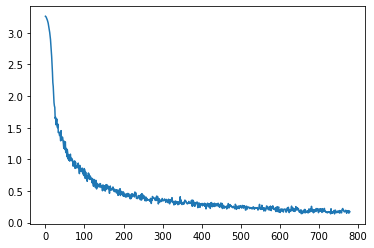


Test set: Average loss: 0.0003, Accuracy: 11783/13000 (91%)



In [26]:
train_set, test_set = load_set()
train_loader, test_loader = load_data(1000,train_set,test_set) # (batch_size)
model,criterion,optimizer = prep_model('Net3_2000','NLLLoss','SGD',0.1)# learning_rate
train(model,train_loader,criterion,optimizer,epochs=12)
test(model,test_loader,criterion)
#plot_cm(model,test_loader)

Train Epoch: 0 [0/65000 (0%)]tLoss: 3.259310
Train Epoch: 1 [0/65000 (0%)]tLoss: 0.701636
Train Epoch: 2 [0/65000 (0%)]tLoss: 0.423980
Train Epoch: 3 [0/65000 (0%)]tLoss: 0.321808
Train Epoch: 4 [0/65000 (0%)]tLoss: 0.236175
Train Epoch: 5 [0/65000 (0%)]tLoss: 0.219527
Train Epoch: 6 [0/65000 (0%)]tLoss: 0.198701
Train Epoch: 7 [0/65000 (0%)]tLoss: 0.156431
Train Epoch: 8 [0/65000 (0%)]tLoss: 0.144126
Train Epoch: 9 [0/65000 (0%)]tLoss: 0.096823
Train Epoch: 10 [0/65000 (0%)]tLoss: 0.114404
Train Epoch: 11 [0/65000 (0%)]tLoss: 0.083588
Train Epoch: 12 [0/65000 (0%)]tLoss: 0.094152


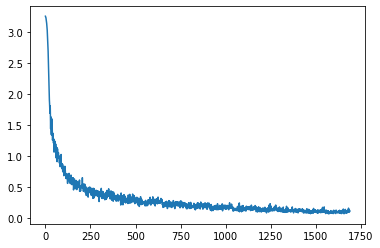


Test set: Average loss: 0.0006, Accuracy: 11837/13000 (91%)



In [27]:
train_set, test_set = load_set()
train_loader, test_loader = load_data(500,train_set,test_set) # (batch_size)
model,criterion,optimizer = prep_model('Net3_2000','NLLLoss','SGD',0.1)# learning_rate
train(model,train_loader,criterion,optimizer,epochs=13)
test(model,test_loader,criterion)
#plot_cm(model,test_loader)

Train Epoch: 0 [0/65000 (0%)]tLoss: 3.257678
Train Epoch: 1 [0/65000 (0%)]tLoss: 0.595461
Train Epoch: 2 [0/65000 (0%)]tLoss: 0.418808
Train Epoch: 3 [0/65000 (0%)]tLoss: 0.231537
Train Epoch: 4 [0/65000 (0%)]tLoss: 0.210590
Train Epoch: 5 [0/65000 (0%)]tLoss: 0.167461
Train Epoch: 6 [0/65000 (0%)]tLoss: 0.170651
Train Epoch: 7 [0/65000 (0%)]tLoss: 0.168298
Train Epoch: 8 [0/65000 (0%)]tLoss: 0.125263
Train Epoch: 9 [0/65000 (0%)]tLoss: 0.144316
Train Epoch: 10 [0/65000 (0%)]tLoss: 0.089204
Train Epoch: 11 [0/65000 (0%)]tLoss: 0.102094
Train Epoch: 12 [0/65000 (0%)]tLoss: 0.095783
Train Epoch: 13 [0/65000 (0%)]tLoss: 0.063042
Train Epoch: 14 [0/65000 (0%)]tLoss: 0.073928
Train Epoch: 15 [0/65000 (0%)]tLoss: 0.063378
Train Epoch: 16 [0/65000 (0%)]tLoss: 0.065891
Train Epoch: 17 [0/65000 (0%)]tLoss: 0.056980
Train Epoch: 18 [0/65000 (0%)]tLoss: 0.060383
Train Epoch: 19 [0/65000 (0%)]tLoss: 0.055548
Train Epoch: 20 [0/65000 (0%)]tLoss: 0.071264
Train Epoch: 21 [0/65000 (0%)]tLoss: 0.04546

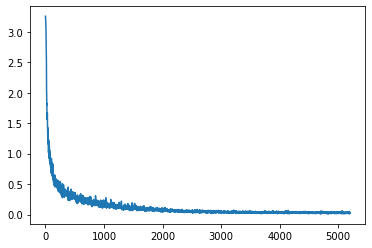


Test set: Average loss: 0.0008, Accuracy: 11884/13000 (91%)



In [28]:
train_set, test_set = load_set()
train_loader, test_loader = load_data(500,train_set,test_set) # (batch_size)
model,criterion,optimizer = prep_model('Net3_2000','NLLLoss','SGD',0.1)# learning_rate
train(model,train_loader,criterion,optimizer,epochs=40)
test(model,test_loader,criterion)
#plot_cm(model,test_loader)

2.

Train Epoch: 0 [0/65000 (0%)]tLoss: 3.256438
Train Epoch: 1 [0/65000 (0%)]tLoss: 0.659877
Train Epoch: 2 [0/65000 (0%)]tLoss: 0.385855
Train Epoch: 3 [0/65000 (0%)]tLoss: 0.319870
Train Epoch: 4 [0/65000 (0%)]tLoss: 0.234116
Train Epoch: 5 [0/65000 (0%)]tLoss: 0.208998
Train Epoch: 6 [0/65000 (0%)]tLoss: 0.229774
Train Epoch: 7 [0/65000 (0%)]tLoss: 0.142031
Train Epoch: 8 [0/65000 (0%)]tLoss: 0.177596
Train Epoch: 9 [0/65000 (0%)]tLoss: 0.118883
Train Epoch: 10 [0/65000 (0%)]tLoss: 0.127974
Train Epoch: 11 [0/65000 (0%)]tLoss: 0.069916
Train Epoch: 12 [0/65000 (0%)]tLoss: 0.068537
Train Epoch: 13 [0/65000 (0%)]tLoss: 0.061655
Train Epoch: 14 [0/65000 (0%)]tLoss: 0.072296
Train Epoch: 15 [0/65000 (0%)]tLoss: 0.058342
Train Epoch: 16 [0/65000 (0%)]tLoss: 0.067281
Train Epoch: 17 [0/65000 (0%)]tLoss: 0.050964
Train Epoch: 18 [0/65000 (0%)]tLoss: 0.053218
Train Epoch: 19 [0/65000 (0%)]tLoss: 0.055126
Train Epoch: 20 [0/65000 (0%)]tLoss: 0.045914
Train Epoch: 21 [0/65000 (0%)]tLoss: 0.03508

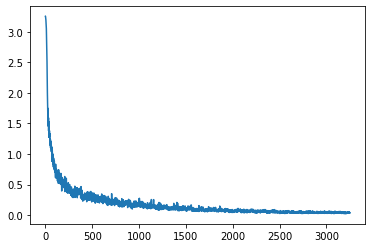


Test set: Average loss: 0.0007, Accuracy: 11928/13000 (92%)



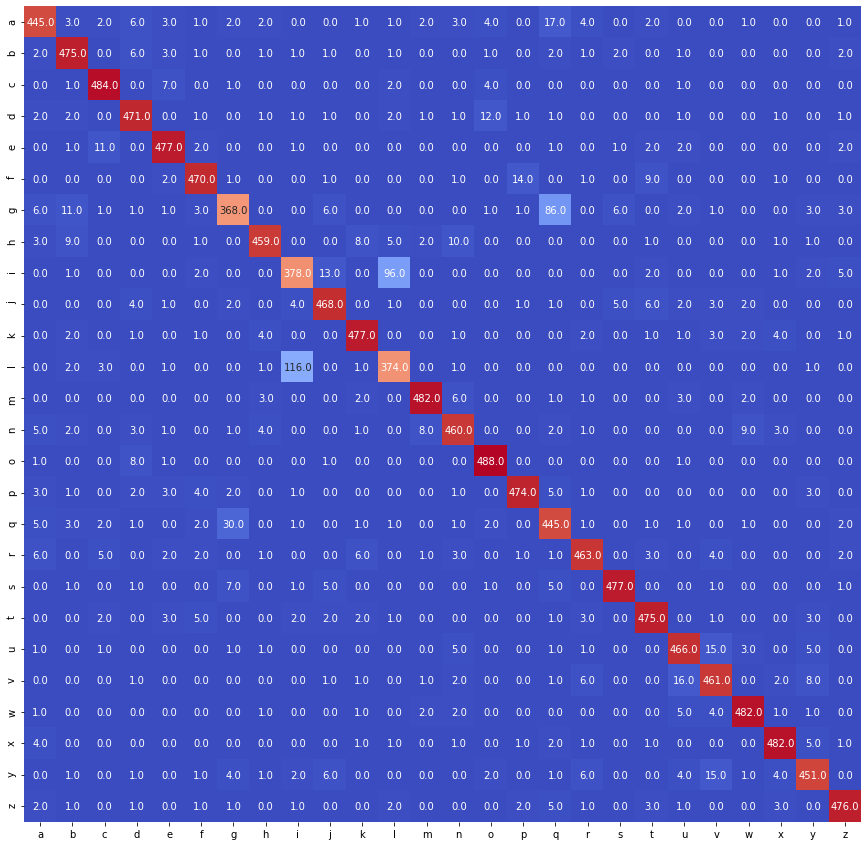

In [29]:
train_set, test_set = load_set()
train_loader, test_loader = load_data(500,train_set,test_set) # (batch_size)
model,criterion,optimizer = prep_model('Net3_2000','NLLLoss','SGD',0.1)# learning_rate
train(model,train_loader,criterion,optimizer,epochs=25)
test(model,test_loader,criterion)
plot_cm(model,test_loader)

Лучше всего детектируется o, хуже всего детектируется g

3.

['i','l']['l','i']['g','q']['q','g']['a','q']['y','v']['v','y']['u','v']['v','u']['h','n']

i
Accuracy:  0.808
Неправильная детектированная буква l


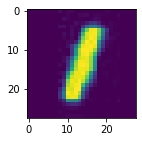

In [39]:
char = ['i','l']
c = 0
im = []
for i in range(500):
    if test_set.classes[model(test_set[(test_set.classes.index(char[0])+1)*500-500+i][0][0].view(-1,28*28)).data.max(1)[1]] == char[1]:
        c+=1
        im.append((test_set.classes.index(char[1])+1)*500-500+i)
print(char[0])
print('Accuracy: ',1 - c/500)
print('Неправильная детектированная буква',char[1])
plt.figure(figsize=(2,2))
plt.imshow(test_set[im[0]][0][0].transpose(-2,-1))
plt.show()

l
Accuracy:  0.768
Неправильная детектированная буква i


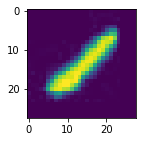

In [38]:
char = ['l','i']
c = 0
im = []
for i in range(500):
    if test_set.classes[model(test_set[(test_set.classes.index(char[0])+1)*500-500+i][0][0].view(-1,28*28)).data.max(1)[1]] == char[1]:
        c+=1
        im.append((test_set.classes.index(char[1])+1)*500-500+i)
print(char[0])
print('Accuracy: ',1 - c/500)
print('Неправильная детектированная буква',char[1])
plt.figure(figsize=(2,2))
plt.imshow(test_set[im[0]][0][0].transpose(-2,-1))
plt.show()

g
Accuracy:  0.8280000000000001
Неправильная детектированная буква q


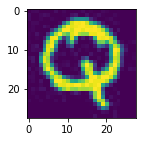

In [40]:
char = ['g','q']
c = 0
im = []
for i in range(500):
    if test_set.classes[model(test_set[(test_set.classes.index(char[0])+1)*500-500+i][0][0].view(-1,28*28)).data.max(1)[1]] == char[1]:
        c+=1
        im.append((test_set.classes.index(char[1])+1)*500-500+i)
print(char[0])
print('Accuracy: ',1 - c/500)
print('Неправильная детектированная буква',char[1])
plt.figure(figsize=(2,2))
plt.imshow(test_set[im[0]][0][0].transpose(-2,-1))
plt.show()

q
Accuracy:  0.94
Неправильная детектированная буква g


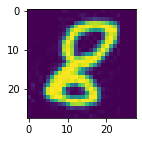

In [41]:
char = ['q','g']
c = 0
im = []
for i in range(500):
    if test_set.classes[model(test_set[(test_set.classes.index(char[0])+1)*500-500+i][0][0].view(-1,28*28)).data.max(1)[1]] == char[1]:
        c+=1
        im.append((test_set.classes.index(char[1])+1)*500-500+i)
print(char[0])
print('Accuracy: ',1 - c/500)
print('Неправильная детектированная буква',char[1])
plt.figure(figsize=(2,2))
plt.imshow(test_set[im[0]][0][0].transpose(-2,-1))
plt.show()

a
Accuracy:  0.966
Неправильная детектированная буква q


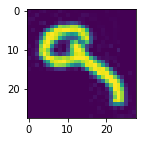

In [42]:
char = ['a','q']
c = 0
im = []
for i in range(500):
    if test_set.classes[model(test_set[(test_set.classes.index(char[0])+1)*500-500+i][0][0].view(-1,28*28)).data.max(1)[1]] == char[1]:
        c+=1
        im.append((test_set.classes.index(char[1])+1)*500-500+i)
print(char[0])
print('Accuracy: ',1 - c/500)
print('Неправильная детектированная буква',char[1])
plt.figure(figsize=(2,2))
plt.imshow(test_set[im[0]][0][0].transpose(-2,-1))
plt.show()

y
Accuracy:  0.97
Неправильная детектированная буква v


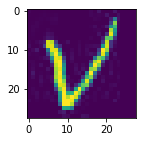

In [43]:
char = ['y','v']
c = 0
im = []
for i in range(500):
    if test_set.classes[model(test_set[(test_set.classes.index(char[0])+1)*500-500+i][0][0].view(-1,28*28)).data.max(1)[1]] == char[1]:
        c+=1
        im.append((test_set.classes.index(char[1])+1)*500-500+i)
print(char[0])
print('Accuracy: ',1 - c/500)
print('Неправильная детектированная буква',char[1])
plt.figure(figsize=(2,2))
plt.imshow(test_set[im[0]][0][0].transpose(-2,-1))
plt.show()

v
Accuracy:  0.984
Неправильная детектированная буква y


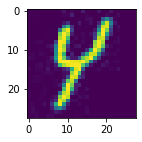

In [44]:
char = ['v','y']
c = 0
im = []
for i in range(500):
    if test_set.classes[model(test_set[(test_set.classes.index(char[0])+1)*500-500+i][0][0].view(-1,28*28)).data.max(1)[1]] == char[1]:
        c+=1
        im.append((test_set.classes.index(char[1])+1)*500-500+i)
print(char[0])
print('Accuracy: ',1 - c/500)
print('Неправильная детектированная буква',char[1])
plt.figure(figsize=(2,2))
plt.imshow(test_set[im[0]][0][0].transpose(-2,-1))
plt.show()

u
Accuracy:  0.97
Неправильная детектированная буква v


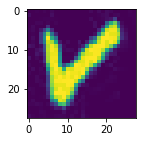

In [45]:
char = ['u','v']
c = 0
im = []
for i in range(500):
    if test_set.classes[model(test_set[(test_set.classes.index(char[0])+1)*500-500+i][0][0].view(-1,28*28)).data.max(1)[1]] == char[1]:
        c+=1
        im.append((test_set.classes.index(char[1])+1)*500-500+i)
print(char[0])
print('Accuracy: ',1 - c/500)
print('Неправильная детектированная буква',char[1])
plt.figure(figsize=(2,2))
plt.imshow(test_set[im[0]][0][0].transpose(-2,-1))
plt.show()

v
Accuracy:  0.968
Неправильная детектированная буква u


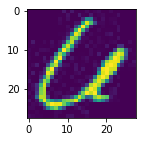

In [46]:
char = ['v','u']
c = 0
im = []
for i in range(500):
    if test_set.classes[model(test_set[(test_set.classes.index(char[0])+1)*500-500+i][0][0].view(-1,28*28)).data.max(1)[1]] == char[1]:
        c+=1
        im.append((test_set.classes.index(char[1])+1)*500-500+i)
print(char[0])
print('Accuracy: ',1 - c/500)
print('Неправильная детектированная буква',char[1])
plt.figure(figsize=(2,2))
plt.imshow(test_set[im[0]][0][0].transpose(-2,-1))
plt.show()

h
Accuracy:  0.98
Неправильная детектированная буква n


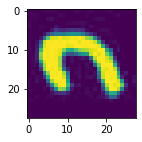

In [47]:
char = ['h','n']
c = 0
im = []
for i in range(500):
    if test_set.classes[model(test_set[(test_set.classes.index(char[0])+1)*500-500+i][0][0].view(-1,28*28)).data.max(1)[1]] == char[1]:
        c+=1
        im.append((test_set.classes.index(char[1])+1)*500-500+i)
print(char[0])
print('Accuracy: ',1 - c/500)
print('Неправильная детектированная буква',char[1])
plt.figure(figsize=(2,2))
plt.imshow(test_set[im[0]][0][0].transpose(-2,-1))
plt.show()

1. Постройте и обучите модели нейронной сети с 1-м, 2-мя и 3-мя сверточными слоями.  
Попробуйте различные значения параметров сверток и числа фильтров на каждом слое. Оцените качество моделей с различными параметрами, проведите сравнительный анализ.  
2. Для наилучшей конфигурации из предыдущего пункта, сравните, как меняется качество модели при увеличении размера батча при использовании BatchNorm и GroupNorm.    

In [72]:
class ConvNet3(nn.Module): 
    def __init__(self): 
        super(ConvNet3, self).__init__() 
        self.layer1 = nn.Sequential( nn.Conv2d(1, 32, kernel_size=5, stride=1, padding=2), 
            nn.ReLU(), nn.MaxPool2d(kernel_size=2, stride=2)) 
        self.layer2 = nn.Sequential( nn.Conv2d(32, 64, kernel_size=5, stride=1, padding=2), 
            nn.ReLU(), nn.MaxPool2d(kernel_size=2, stride=2)) 
        self.layer3 = nn.Sequential( nn.Conv2d(64, 128, kernel_size=5, stride=1, padding=2), 
            nn.ReLU(), nn.MaxPool2d(kernel_size=2, stride=2)) 
        self.drop_out = nn.Dropout() 
        self.fc1 = nn.Linear(1152, 1000) 
        self.fc2 = nn.Linear(1000, 26)
    def forward(self, x): 
        out = self.layer1(x) 
        out = self.layer2(out)
        out = self.layer3(out)
        out = out.reshape(out.size(0), -1) 
        out = self.drop_out(out) 
        out = self.fc1(out) 
        out = self.fc2(out) 
        return out
    
    
class ConvNet3_b(nn.Module): 
    def __init__(self): 
        super(ConvNet3_b, self).__init__() 
        self.layer1 = nn.Sequential( nn.Conv2d(1, 32, kernel_size=5, stride=1, padding=2), 
            nn.ReLU(), nn.MaxPool2d(kernel_size=2, stride=2),nn.BatchNorm2d(32)) 
        self.layer2 = nn.Sequential( nn.Conv2d(32, 64, kernel_size=5, stride=1, padding=2), 
            nn.ReLU(), nn.MaxPool2d(kernel_size=2, stride=2),nn.BatchNorm2d(64)) 
        self.layer3 = nn.Sequential( nn.Conv2d(64, 128, kernel_size=5, stride=1, padding=2), 
            nn.ReLU(), nn.MaxPool2d(kernel_size=2, stride=2),nn.BatchNorm2d(128)) 
        self.drop_out = nn.Dropout() 
        self.fc1 = nn.Linear(1152, 1000) 
        self.fc2 = nn.Linear(1000, 26)
    def forward(self, x): 
        out = self.layer1(x) 
        out = self.layer2(out)
        out = self.layer3(out)
        out = out.reshape(out.size(0), -1) 
        out = self.drop_out(out) 
        out = self.fc1(out) 
        out = self.fc2(out) 
        return out

class ConvNet3_pr(nn.Module): 
    def __init__(self): 
        super(ConvNet3_pr, self).__init__() 
        self.layer1 = nn.Sequential( nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=0), 
            nn.ReLU(), nn.MaxPool2d(kernel_size=2, stride=2)) 
        self.layer2 = nn.Sequential( nn.Conv2d(32, 64, kernel_size=5, stride=1, padding=0), 
            nn.ReLU(), nn.MaxPool2d(kernel_size=2, stride=2)) 
        self.layer3 = nn.Sequential( nn.Conv2d(64, 128, kernel_size=2, stride=1, padding=2), 
            nn.ReLU(), nn.MaxPool2d(kernel_size=2, stride=2)) 
        self.drop_out = nn.Dropout() 
        self.fc1 = nn.Linear(1152, 1000) 
        self.fc2 = nn.Linear(1000, 26)
    def forward(self, x): 
        out = self.layer1(x) 
        out = self.layer2(out)
        out = self.layer3(out)
        out = out.reshape(out.size(0), -1) 
        out = self.drop_out(out) 
        out = self.fc1(out) 
        out = self.fc2(out) 
        return out    
    
class ConvNet3_pr1(nn.Module): 
    def __init__(self): 
        super(ConvNet3_pr1, self).__init__() 
        self.layer1 = nn.Sequential( nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=0), 
            nn.ReLU(), nn.MaxPool2d(kernel_size=2, stride=2)) 
        self.layer2 = nn.Sequential( nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=0), 
            nn.ReLU(), nn.MaxPool2d(kernel_size=2, stride=2)) 
        self.layer3 = nn.Sequential( nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=0), 
            nn.ReLU(), nn.MaxPool2d(kernel_size=2, stride=2)) 
        self.drop_out = nn.Dropout() 
        self.fc1 = nn.Linear(128, 1000) 
        self.fc2 = nn.Linear(1000, 26)
    def forward(self, x): 
        out = self.layer1(x) 
        out = self.layer2(out)
        out = self.layer3(out)
        out = out.reshape(out.size(0), -1) 
        out = self.drop_out(out) 
        out = self.fc1(out) 
        out = self.fc2(out) 
        return out        
    
    
class ConvNet2(nn.Module): 
    def __init__(self): 
        super(ConvNet2, self).__init__() 
        self.layer1 = nn.Sequential( nn.Conv2d(1, 32, kernel_size=5, stride=1, padding=2), 
            nn.ReLU(), nn.MaxPool2d(kernel_size=2, stride=2)) 
        self.layer2 = nn.Sequential( nn.Conv2d(32, 64, kernel_size=5, stride=1, padding=2), 
            nn.ReLU(), nn.MaxPool2d(kernel_size=2, stride=2)) 
        self.drop_out = nn.Dropout() 
        self.fc1 = nn.Linear(7 * 7 * 64, 1000) 
        self.fc2 = nn.Linear(1000, 26)
    def forward(self, x): 
        out = self.layer1(x) 
        out = self.layer2(out) 
        out = out.reshape(out.size(0), -1) 
        out = self.drop_out(out) 
        out = self.fc1(out) 
        out = self.fc2(out) 
        return out

class ConvNet1(nn.Module): 
    def __init__(self): 
        super(ConvNet1, self).__init__() 
        self.layer1 = nn.Sequential( nn.Conv2d(1, 32, kernel_size=5, stride=1, padding=2), 
            nn.ReLU(), nn.MaxPool2d(kernel_size=2, stride=2)) 
        self.drop_out = nn.Dropout() 
        self.fc1 = nn.Linear(2 * 7 * 7 * 64, 1000) 
        self.fc2 = nn.Linear(1000, 26)
    def forward(self, x): 
        out = self.layer1(x) 
        out = out.reshape(out.size(0), -1) 
        out = self.drop_out(out) 
        out = self.fc1(out) 
        out = self.fc2(out) 
        return out

In [ ]:
def trainC(model,train_loader,criterion,optimizer,log_interval=500,epochs=10):
            
    total_step = len(train_loader)
    loss_list = []
    acc_list = []
    f = []
    for epoch in range(epochs):
        for i, (images, labels) in enumerate(train_loader):
            # Прямой запуск
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss_list.append(loss.item())

            # Обратное распространение и оптимизатор
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            f.append(loss.data)
            
            # Отслеживание точности
            total = labels.size(0)
            _, predicted = torch.max(outputs.data, 1)
            correct = (predicted == labels).sum().item()
            acc_list.append(correct / total)

            if (i + 1) % 100 == 0:
                print('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}, Accuracy: {:.2f}%'
                      .format(epoch + 1, epochs, i + 1, total_step, loss.item(),
                              (correct / total) * 100))          
    
    plt.plot(f)
    plt.show()

def testC(model,test_loader,criterion):
    model.eval()
    with torch.no_grad():
        
        test_loss = 0
        correct = 0
        for data, target in test_loader:
            data, target = Variable(data), Variable(target)
            model_out = model(data)
            test_loss += criterion(model_out, target).data
            pred = model_out.data.max(1)[1]
            correct += pred.eq(target.data).sum()

        test_loss /= len(test_loader.dataset)
        print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
            test_loss, correct, len(test_loader.dataset),
            100. * correct / len(test_loader.dataset)))
        
def plot_cmC(model, test_loader):
    nb_classes = 26

    confusion__matrix = torch.zeros(nb_classes, nb_classes)
    with torch.no_grad():
        for i, (inputs, classes) in enumerate(test_loader):      
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for t, p in zip(classes.view(-1), preds.view(-1)):
                confusion__matrix[t.int(), p.int()] += 1
    plt.figure(figsize = (15,15))
    sn.heatmap(confusion__matrix, annot=True, annot_kws={"size": 10},
          xticklabels=test_set.classes, yticklabels=test_set.classes,cmap= 'coolwarm', cbar=False, fmt=".1f")
    plt.show()

1.

Epoch [1/5], Step [100/130], Loss: 1.9054, Accuracy: 44.00%
Epoch [2/5], Step [100/130], Loss: 1.5915, Accuracy: 52.00%
Epoch [3/5], Step [100/130], Loss: 1.6979, Accuracy: 50.80%
Epoch [4/5], Step [100/130], Loss: 1.5526, Accuracy: 53.20%
Epoch [5/5], Step [100/130], Loss: 1.6354, Accuracy: 54.20%


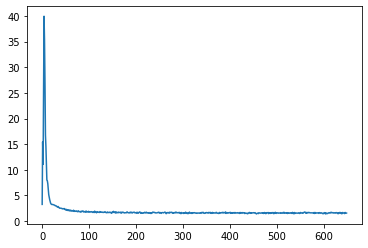


Test set: Average loss: 0.0025, Accuracy: 8195/13000 (63%)



In [67]:
train_set, test_set = load_set()
train_loader, test_loader = load_data(500,train_set,test_set) # (batch_size)
model,criterion,optimizer = prep_model('CNN1','CrossEntropyLoss','Adam',0.01)# learning_rate
trainC(model,train_loader,criterion,optimizer,epochs=5)
testC(model,test_loader,criterion)
#plot_cmC(model,test_loader)

Epoch [1/5], Step [100/130], Loss: 1.5830, Accuracy: 49.80%
Epoch [2/5], Step [100/130], Loss: 1.0635, Accuracy: 68.00%
Epoch [3/5], Step [100/130], Loss: 0.9942, Accuracy: 65.80%
Epoch [4/5], Step [100/130], Loss: 0.9554, Accuracy: 69.40%
Epoch [5/5], Step [100/130], Loss: 0.8851, Accuracy: 70.00%


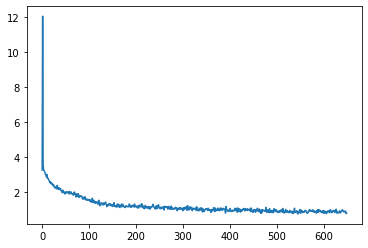


Test set: Average loss: 0.0010, Accuracy: 10901/13000 (84%)



In [51]:
train_set, test_set = load_set()
train_loader, test_loader = load_data(500,train_set,test_set) # (batch_size)
model,criterion,optimizer = prep_model('CNN2','CrossEntropyLoss','Adam',0.01)# learning_rate
trainC(model,train_loader,criterion,optimizer,epochs=5)
testC(model,test_loader,criterion)
#plot_cmC(model,test_loader)

Epoch [1/10], Step [100/130], Loss: 1.0295, Accuracy: 66.40%
Epoch [2/10], Step [100/130], Loss: 0.7354, Accuracy: 74.80%
Epoch [3/10], Step [100/130], Loss: 0.5847, Accuracy: 80.00%
Epoch [4/10], Step [100/130], Loss: 0.5313, Accuracy: 82.40%
Epoch [5/10], Step [100/130], Loss: 0.5810, Accuracy: 82.00%
Epoch [6/10], Step [100/130], Loss: 0.4402, Accuracy: 87.80%
Epoch [7/10], Step [100/130], Loss: 0.3908, Accuracy: 89.60%
Epoch [8/10], Step [100/130], Loss: 0.4395, Accuracy: 86.20%
Epoch [9/10], Step [100/130], Loss: 0.4802, Accuracy: 83.80%
Epoch [10/10], Step [100/130], Loss: 0.4853, Accuracy: 83.20%


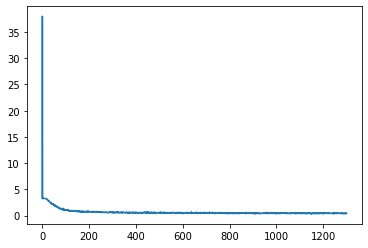


Test set: Average loss: 0.0006, Accuracy: 11816/13000 (91%)



In [52]:
train_set, test_set = load_set()
train_loader, test_loader = load_data(500,train_set,test_set) # (batch_size)
model,criterion,optimizer = prep_model('CNN3','CrossEntropyLoss','Adam',0.01)# learning_rate
trainC(model,train_loader,criterion,optimizer,epochs=10)
testC(model,test_loader,criterion)
#plot_cmC(model,test_loader)

Epoch [1/10], Step [100/130], Loss: 2.4858, Accuracy: 27.40%
Epoch [2/10], Step [100/130], Loss: 1.6709, Accuracy: 50.40%
Epoch [3/10], Step [100/130], Loss: 1.5786, Accuracy: 47.60%
Epoch [4/10], Step [100/130], Loss: 1.4066, Accuracy: 54.40%
Epoch [5/10], Step [100/130], Loss: 1.3819, Accuracy: 57.80%
Epoch [6/10], Step [100/130], Loss: 1.1715, Accuracy: 63.40%
Epoch [7/10], Step [100/130], Loss: 1.1508, Accuracy: 62.20%
Epoch [8/10], Step [100/130], Loss: 1.3202, Accuracy: 58.20%
Epoch [9/10], Step [100/130], Loss: 1.1416, Accuracy: 62.40%
Epoch [10/10], Step [100/130], Loss: 1.0369, Accuracy: 65.60%


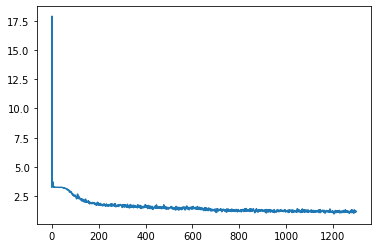


Test set: Average loss: 0.0016, Accuracy: 9812/13000 (75%)



In [68]:
train_set, test_set = load_set()
train_loader, test_loader = load_data(500,train_set,test_set) # (batch_size)
model,criterion,optimizer = prep_model('CNN3_pr','CrossEntropyLoss','Adam',0.01)# learning_rate
trainC(model,train_loader,criterion,optimizer,epochs=10)
testC(model,test_loader,criterion)
#plot_cmC(model,test_loader)

2.

Epoch [1/10], Step [100/130], Loss: 0.5899, Accuracy: 86.40%
Epoch [2/10], Step [100/130], Loss: 0.4218, Accuracy: 86.00%
Epoch [3/10], Step [100/130], Loss: 0.3452, Accuracy: 88.40%
Epoch [4/10], Step [100/130], Loss: 0.3683, Accuracy: 89.00%
Epoch [5/10], Step [100/130], Loss: 0.2396, Accuracy: 91.20%
Epoch [6/10], Step [100/130], Loss: 0.2502, Accuracy: 92.40%
Epoch [7/10], Step [100/130], Loss: 0.2403, Accuracy: 92.40%
Epoch [8/10], Step [100/130], Loss: 0.1857, Accuracy: 93.20%
Epoch [9/10], Step [100/130], Loss: 0.2144, Accuracy: 92.80%
Epoch [10/10], Step [100/130], Loss: 0.1503, Accuracy: 94.00%


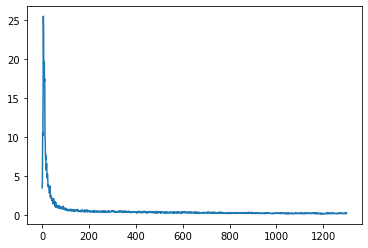


Test set: Average loss: 0.0004, Accuracy: 12130/13000 (93%)



In [73]:
train_set, test_set = load_set()
train_loader, test_loader = load_data(500,train_set,test_set) # (batch_size)
model,criterion,optimizer = prep_model('CNN3_b','CrossEntropyLoss','Adam',0.01)# learning_rate
trainC(model,train_loader,criterion,optimizer,epochs=10)
testC(model,test_loader,criterion)
#plot_cmC(model,test_loader)

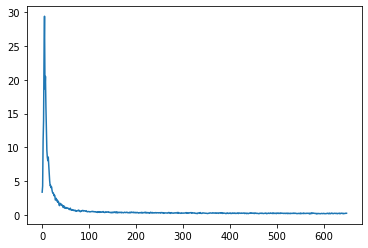


Test set: Average loss: 0.0002, Accuracy: 12064/13000 (93%)



In [74]:
train_set, test_set = load_set()
train_loader, test_loader = load_data(1000,train_set,test_set) # (batch_size)
model,criterion,optimizer = prep_model('CNN3_b','CrossEntropyLoss','Adam',0.01)# learning_rate
trainC(model,train_loader,criterion,optimizer,epochs=10)
testC(model,test_loader,criterion)
#plot_cmC(model,test_loader)

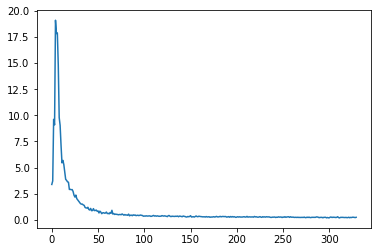


Test set: Average loss: 0.0001, Accuracy: 12154/13000 (93%)



In [75]:
train_set, test_set = load_set()
train_loader, test_loader = load_data(2000,train_set,test_set) # (batch_size)
model,criterion,optimizer = prep_model('CNN3_b','CrossEntropyLoss','Adam',0.01)# learning_rate
trainC(model,train_loader,criterion,optimizer,epochs=10)
testC(model,test_loader,criterion)
#plot_cmC(model,test_loader)

С ростом батча растет время обучения, но качество тоже.